## Predição do valor de carro usados

In [1]:
# Todos os imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

## 1 - Carregamento dos dados e EDA inicial

**1.** Baixe os dados a partir do Kaggle e carregue-os no notebook

In [2]:
# Carregamento do arquivo, baixei no site e carreguei aqui. Para info estou usando o vscode...
arquivo = "cars.csv"
dados_carros = pd.read_csv(arquivo)

**2.** Mostre se existem dados faltantes no dataset

In [3]:
# Verificando se há dados faltantes
dados_faltantes = dados_carros.isnull().sum()
print("Dados faltantes no dataset:")
print(dados_faltantes)

# Da pra ver que tem dados faltando em engine_capacity

Dados faltantes no dataset:
manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


**3.** Mostre se existem dados duplicados no dataset

In [4]:
# Verificando se há dados duplicados
dados_duplicados = dados_carros[dados_carros.duplicated()]
# Mostrando os dados duplicados, se houver
if not dados_duplicados.empty:
    print("Dados duplicados no dataset:")
    print(dados_duplicados)
else:
    print("Não há dados duplicados no dataset.")
    
# Tem 40 linhas com dados duplicados

Dados duplicados no dataset:
      manufacturer_name model_name transmission   color  odometer_value  \
5767         Mitsubishi     Lancer    automatic   black          250000   
6556            Citroen     Xantia   mechanical  silver          520000   
9996               Ford    Scorpio   mechanical  yellow           55555   
11380              Ford    Transit   mechanical    grey          700000   
11704              Ford     Mondeo   mechanical   green          380000   
12810           Renault         19   mechanical    blue           99999   
17338        Volkswagen    Touareg    automatic    grey          337400   
18184        Volkswagen     Passat   mechanical   black          157000   
31993             Skoda      Rapid    automatic  silver               0   
32017             Skoda      Rapid   mechanical    blue               0   
32018             Skoda      Rapid   mechanical    blue               0   
32022             Skoda      Rapid   mechanical   black               0

**4.** Mostre informações gerais sobre o dataset utilizando o df.info

In [5]:
# Mostrando informações gerais sobre o dataset
print(dados_carros.info())

"""
São 38531 linhas e 30 colunas
Existem colunas com diferentes tipos de dados como float64, bool, int64 e object
Aqui da pra ver novamente que engine capacity tem dados faltando
Tem colunas com variáveis categóricas, como transmission, color, etc
Também tem colunas boleanas
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

'\nSão 38531 linhas e 30 colunas\nExistem colunas com diferentes tipos de dados como float64, bool, int64 e object\nAqui da pra ver novamente que engine capacity tem dados faltando\nTem colunas com variáveis categóricas, como transmission, color, etc\nTambém tem colunas boleanas\n'

**5.** Plote histogramas das colunas numéricas

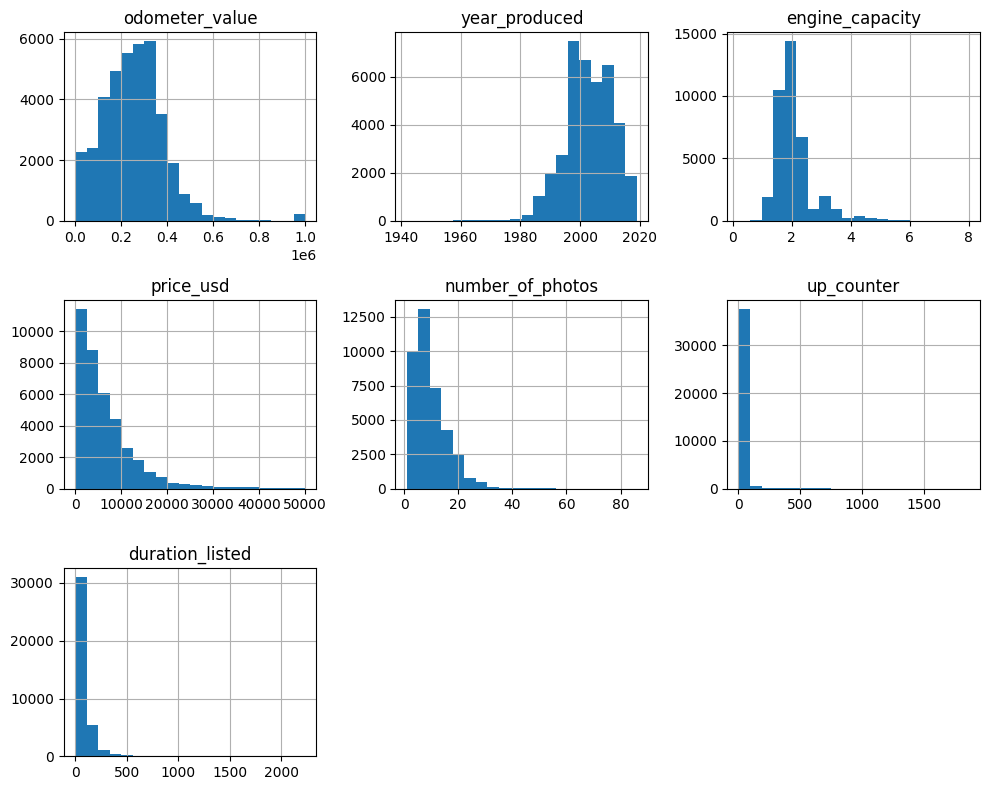

In [6]:
# Selecionando apenas as colunas numéricas
colunas_numericas = dados_carros.select_dtypes(include=['int64', 'float64'])
# Plotando histogramas das colunas numéricas
colunas_numericas.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

**6.** Mostre a distribuição das variáveis binárias

<Figure size 1200x600 with 0 Axes>

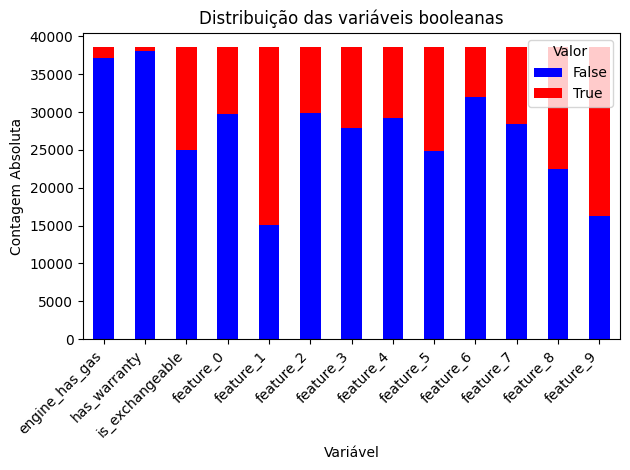

Contagem Absoluta:
       engine_has_gas  has_warranty  is_exchangeable  feature_0  feature_1  \
False           37184         38082            24945      29725      15135   
True             1347           449            13586       8806      23396   

       feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
False      29907      27904      29227      24811      31943      28369   
True        8624      10627       9304      13720       6588      10162   

       feature_8  feature_9  
False      22528      16206  
True       16003      22325  

Contagem Percentual (%):
      engine_has_gas has_warranty is_exchangeable feature_0 feature_1  \
False         96.50%       98.83%          64.74%    77.15%    39.28%   
True           3.50%        1.17%          35.26%    22.85%    60.72%   

      feature_2 feature_3 feature_4 feature_5 feature_6 feature_7 feature_8  \
False    77.62%    72.42%    75.85%    64.39%    82.90%    73.63%    58.47%   
True     22.38%    27.58% 

In [7]:
# Selecionando apenas as colunas binárias
colunas_binarias = dados_carros.select_dtypes(include='bool')

# Calculando a contagem absoluta de cada valor em cada coluna binária, usei essa função pois o terminal indicou ao invés de usar "pd.value_counts"
contagem_absoluta = colunas_binarias.apply(lambda x: pd.Series(x).value_counts())

# Gráfico de barras empilhadas para colunas binárias, achei mais fácil a visualização em apenas um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
contagem_absoluta.T.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Distribuição das variáveis booleanas')
plt.xlabel('Variável')
plt.ylabel('Contagem Absoluta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Valor')
plt.tight_layout()
plt.show()

# Mostrando as tabelas de contagem absoluta e percentual
# Função formatar_com_percentual apenas para adicionar o símbolo % no final do print
def formatar_com_percentual(x):
    return f"{x:.2f}%"
print("Contagem Absoluta:")
print(contagem_absoluta)
print("\nContagem Percentual (%):")
print((contagem_absoluta / contagem_absoluta.sum() * 100).map(formatar_com_percentual))
# Com as % fica mais fácil de ver a diferença entre True e False de cada booleana.

**7.** Comente a respeito do que foi encontrado nessa etapa do trabalho.
Existe algum dado que aparente ter inconsistências ou problemas? Discorra a respeito.


In [8]:
"""
Foram identificados que existem dados faltante em engine_capacity, que indicam problemas na coleta dos dados ou no cadastro das informações.
Existem linhas duplicadas no dataset, onde se essas duplicadas não fazerem sentido na análise podem ser removidas.
Os histogramas das variáveis numéricas mostram uma visão geral da distribuição dos dados, mas não indicam diretamente problemas nesses dados,
porém, existem alguns valores extremos como em odometer_value que podem ser analisados como inconsistências nos dados.
"""

'\nForam identificados que existem dados faltante em engine_capacity, que indicam problemas na coleta dos dados ou no cadastro das informações.\nExistem linhas duplicadas no dataset, onde se essas duplicadas não fazerem sentido na análise podem ser removidas.\nOs histogramas das variáveis numéricas mostram uma visão geral da distribuição dos dados, mas não indicam diretamente problemas nesses dados,\nporém, existem alguns valores extremos como em odometer_value que podem ser analisados como inconsistências nos dados.\n'

## 2 - Limpeza e separação dos dados

**1.** Retire as linhas referentes aos dados duplicados

In [9]:
# Remover linhas duplicadas
dados_sem_duplicadas = dados_carros.drop_duplicates()
# Resolvi verificar o número de linhas após a remoção de duplicatas
print("Número de linhas antes da remoção de duplicatas:", len(dados_carros))
print("Número de linhas após remoção de duplicatas:", len(dados_sem_duplicadas))
print("Número de linhas removidas: ", (len(dados_carros) - len(dados_sem_duplicadas)))

# O número de linhas removidas esta coerente com a quantidade de duplicadas encontradas anteriormente

Número de linhas antes da remoção de duplicatas: 38531
Número de linhas após remoção de duplicatas: 38491
Número de linhas removidas:  40


**2.** Selecione somente a parte do dataset onde o estado do carro (state) é
usado (owned)

In [10]:
# Selecionando somente as linhas onde o estado do carro é "usado"
dados_carros_usados = dados_sem_duplicadas[dados_sem_duplicadas['state'] == 'owned']

# Verificando o número de linhas no novo DataFrame
print("Número de linhas onde o estado do carro é 'usado':", len(dados_carros_usados))
print("Quantidade de linhas a menos que os dados sem duplicadas: ", (len(dados_sem_duplicadas) - len(dados_carros_usados)))

Número de linhas onde o estado do carro é 'usado': 37715
Quantidade de linhas a menos que os dados sem duplicadas:  776


**3.** Selecione somente a parte do dataset onde o odômetro
(odometer_value) é menor que 999.999

In [11]:
# Selecionando somente as linhas onde o odômetro é < 999.999
dados_carros_odometro = dados_carros_usados[dados_carros_usados['odometer_value'] < 999999]

# Verificando o novo número de linhas
print("Número de linhas onde o odômetro é menor que 999.999:", len(dados_carros_odometro))
print("Quantidade de linhas a menos que os dados de carros usados: ", (len(dados_carros_usados) - len(dados_carros_odometro)))

Número de linhas onde o odômetro é menor que 999.999: 37505
Quantidade de linhas a menos que os dados de carros usados:  210


**4.** Selecione somente a parte do dataset onde o preço (price_usd) é
maior ou igual a 100


In [12]:
# Selecionando somente as linhas onde o preço é >= 100
dados_carros_preco = dados_carros_odometro[dados_carros_odometro['price_usd'] >= 100]

# Verificando o número de linhas após a seleção
print("Número de linhas onde o preço do carro é >= 100:", len(dados_carros_preco))
print("Quantidade de linhas a menos que os dados de carros odometro: ", (len(dados_carros_odometro) - len(dados_carros_preco)))

Número de linhas onde o preço do carro é >= 100: 37501
Quantidade de linhas a menos que os dados de carros odometro:  4


**5.** Crie duas novas colunas booleanas a partir das colunas transmission e
engine_type:

**5.a.** Crie uma coluna que será verdadeira se a transmissão for automática e falsa se não for (is_transmission_automatic)

**b.** Crie uma coluna que será verdadeira se a engine_type for diesel e falsa se não for (is_engine_type_diesel)

In [13]:
# Pandas estava dando warning sobre usar .loc então resolvi fazer uma copy dos dados pra evitar confusão como sugerido
dados_carros_preco_copy = dados_carros_preco.copy()

# 5.a. Criar a coluna is_transmission_automatic
dados_carros_preco_copy.loc[:, 'is_transmission_automatic'] = np.where(dados_carros_preco_copy['transmission'] == 'automatic', True, False)

# 5.b. Criar a coluna is_engine_type_diesel
dados_carros_preco_copy.loc[:, 'is_engine_type_diesel'] = np.where(dados_carros_preco_copy['engine_type'] == 'diesel', True, False)

# Verificanado as primeiras linhas do DataFrame com as novas colunas
print(dados_carros_preco_copy.head())

# Agora existem 32 colunas ao invés das 30 originais. A inclusão deu certo, as novas colunas estão inseridas

  manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_3  feature_4 feature_5 feature_6  feature_7  feature_8  \
0  ...      True      False      True

**6.** Remova as instâncias referentes a modelos de carros raros, quando o
modelo de carro aparece menos de 15 vezes no dataset

In [14]:
# Calcular contagem de ocorrências de cada modelo de carro
contagem_modelos = dados_carros_preco_copy['model_name'].value_counts()

# Identificando os modelos raros (que aparecem menos de 15 vezes)
modelos_raros = contagem_modelos[contagem_modelos < 15].index

# Remover instâncias correspondentes aos modelos raros
# Usei ~ apenas para inverter o filtro e já salvar os dados que devem ficar diretamente em dados_carros_filtrados
dados_carros_filtrados = dados_carros_preco_copy[~dados_carros_preco_copy['model_name'].isin(modelos_raros)]

# Verificando o número de linhas no DataFrame filtrado
print("Número de linhas após remoção de modelos raros:", len(dados_carros_filtrados))
print("Quantidade de linhas removidas:", (len(dados_carros_preco_copy) - len(dados_carros_filtrados)))

Número de linhas após remoção de modelos raros: 34247
Quantidade de linhas removidas: 3254


**7.** Remova as colunas state, transmission, engine_type, duration_listed e
number_of_photos

In [15]:
# Lista das colunas a serem removidas
colunas_remover = ['state', 'transmission', 'engine_type', 'duration_listed', 'number_of_photos']

# Remover as colunas especificadas
dados_carros_sem_colunas = dados_carros_filtrados.drop(columns=colunas_remover)

# Verificando quantas linhas e colunas do DataFrame ficaram após a remoção
print(dados_carros_sem_colunas)

# A quantidade de linhas e colunas bate com a mensagem deixada no trabalho: [34247 rows x 27 columns]

      manufacturer_name  model_name   color  odometer_value  year_produced  \
0                Subaru     Outback  silver          190000           2010   
1                Subaru     Outback    blue          290000           2002   
2                Subaru    Forester     red          402000           2001   
3                Subaru     Impreza    blue           10000           1999   
4                Subaru      Legacy   black          280000           2001   
...                 ...         ...     ...             ...            ...   
38526          Chrysler         300  silver          290000           2000   
38527          Chrysler  PT Cruiser    blue          321000           2004   
38528          Chrysler         300    blue          777957           2000   
38529          Chrysler  PT Cruiser   black           20000           2001   
38530          Chrysler     Voyager  silver          297729           2000   

      engine_fuel  engine_has_gas  engine_capacity  body_type  

**8.** Divisão estratificada entre train_val e teste

**a.** Crie uma variável auxiliar (price_cat) utilizando a estratificação
quantizada com 10 quantis a partir do preço (price_usd)


In [16]:
# 8.a. Criando a price_cat
price_cat = pd.qcut(dados_carros_sem_colunas['price_usd'], q=10, labels=False)

**8.b.** Utilize essa função para dividir o conjunto de dados de forma
estratificada, separe 20% para teste e 80% para treinamento e
validação (train_val) e com o random_state igual a 42

In [17]:
# 8.b. Dividindo os dados em conjunto de treinamento/validação e teste de forma estratificada com random state 42
train_val, teste = train_test_split(dados_carros_sem_colunas, test_size=0.2, stratify=price_cat, random_state=42)

# Verificando o tamanho dos conjuntos
print("Tamanho do conjunto de treinamento/validação:", len(train_val))
print("Tamanho do conjunto de teste:", len(teste))

"""
Somando 27397 do treinamento com 6850 do teste, dá exatamente 34247, que é o tamanho do dados.
Assim fazendo a conta da pra ver que deu certo os 20% para teste e 80% para treinamento.
"""

Tamanho do conjunto de treinamento/validação: 27397
Tamanho do conjunto de teste: 6850


'\nSomando 27397 do treinamento com 6850 do teste, dá exatamente 34247, que é o tamanho do dados.\nAssim fazendo a conta da pra ver que deu certo os 20% para teste e 80% para treinamento.\n'

**9.** Divisão estratificada entre treinamento e validação

**a.** Crie uma nova variável auxiliar (train_val_price_cat) para fazer
uma nova estratificação quantizada, mas desta vez no train_val
ao invés do dataset completo

In [18]:
# 9.a. Criando a train_val_price_cat
train_val_price_cat = pd.qcut(train_val['price_usd'], q=10, labels=False)

**9.b.** Utilize essa nova variável para dividir o train_val entre
treinamento (75%) e validação (25%)

In [19]:
# 9.b. Dividindo o conjunto train_val em treinamento e validação de forma estratificada
treinamento, validacao = train_test_split(train_val, test_size=0.25, stratify=train_val_price_cat, random_state=42)

# Verificando o tamanho dos conjuntos
print("Tamanho do conjunto de treinamento:", len(treinamento))
print("Tamanho do conjunto de validação:", len(validacao))

"""
Novamente fazendo a conta do tamanho do conjunto de treinamento 20547 e validação 6850, dá pra ver que deu certo a % solicitada sobre os 27397.
A príncipio achei que tinha errado pelo tamanho de 6850 ter aparecido também no item 8, porém questão 9, ao realizar a divisão estratificada 
apenas no conjunto de treinamento/validação, é considerando apenas uma parte dos dados para estratificação. Isso resultou em uma 
distribuição desigual das categorias usadas para estratificação em comparação com o conjunto de dados completo. Então, a proporção entre os 
conjuntos de treinamento e validação pode não ser precisa, levando a uma subestimação na quantidade de dados de treinamento.
Isso significa que poderíamos estar usando menos dados para treinar nosso modelo do que o ideal, o que pode impactar sua eficácia.
"""

Tamanho do conjunto de treinamento: 20547
Tamanho do conjunto de validação: 6850


'\nNovamente fazendo a conta do tamanho do conjunto de treinamento 20547 e validação 6850, dá pra ver que deu certo a % solicitada sobre os 27397.\nA príncipio achei que tinha errado pelo tamanho de 6850 ter aparecido também no item 8, porém questão 9, ao realizar a divisão estratificada \napenas no conjunto de treinamento/validação, é considerando apenas uma parte dos dados para estratificação. Isso resultou em uma \ndistribuição desigual das categorias usadas para estratificação em comparação com o conjunto de dados completo. Então, a proporção entre os \nconjuntos de treinamento e validação pode não ser precisa, levando a uma subestimação na quantidade de dados de treinamento.\nIsso significa que poderíamos estar usando menos dados para treinar nosso modelo do que o ideal, o que pode impactar sua eficácia.\n'

**10.** Separe esses conjuntos entre X_train, y_train, X_val, y_val e X_test e
y_test

In [20]:
# Conjunto de treinamento
X_train = treinamento.drop(columns=['price_usd'])
y_train = treinamento['price_usd']

# Conjunto de validação
X_val = validacao.drop(columns=['price_usd'])
y_val = validacao['price_usd']

# Conjunto de teste
X_test = teste.drop(columns=['price_usd'])
y_test = teste['price_usd']

**11.** Confira o shape apresentado para cada um deles está coerente com o
esperado (60% train, 20% val, 20% test)

In [21]:
# Verificar o shape de cada conjunto
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de X_val:", X_val.shape)
print("Shape de y_val:", y_val.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_test:", y_test.shape)

# Calculando as proporções pra ver se deu certo as %, está OK.
tamanho = len(dados_carros_sem_colunas)
prop_train = round((len(X_train) / tamanho), 2)
prop_val = round((len(X_val) / tamanho), 2)
prop_test = round((len(X_test) / tamanho), 2)
print("\nProporção de treinamento:", prop_train)
print("Proporção de validação:", prop_val)
print("Proporção de teste:", prop_test)

Shape de X_train: (20547, 26)
Shape de y_train: (20547,)
Shape de X_val: (6850, 26)
Shape de y_val: (6850,)
Shape de X_test: (6850, 26)
Shape de y_test: (6850,)

Proporção de treinamento: 0.6
Proporção de validação: 0.2
Proporção de teste: 0.2


## 3 - EDA de treinamento

**1.** Variáveis numéricas (int e float): Observe a correlação de Pearson

**a.** Calcule a correlação a partir do conjunto de treinamento

In [22]:
# 1.a. Pegando os dados numéricos para poder fazer a correlação
dados_numericos = X_train.select_dtypes(include=['int64', 'float64'])
# Calculando a correlação de Pearson
correlacao = dados_numericos.corr()
print("Correlação de Pearson: \n", correlacao)

Correlação de Pearson: 
                  odometer_value  year_produced  engine_capacity  up_counter
odometer_value         1.000000      -0.500035         0.141778   -0.009102
year_produced         -0.500035       1.000000        -0.001221    0.014340
engine_capacity        0.141778      -0.001221         1.000000    0.068808
up_counter            -0.009102       0.014340         0.068808    1.000000


**1.b.** Plote esses resultados em um gráfico de barras

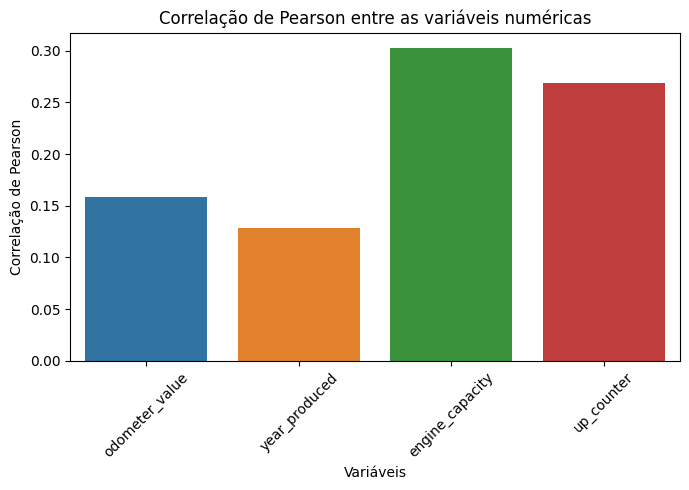

In [23]:
# 1.b. Plotando a matriz de correlação como um gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(data=correlacao, errorbar=None)
plt.title('Correlação de Pearson entre as variáveis numéricas')
plt.xlabel('Variáveis')
plt.ylabel('Correlação de Pearson')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1.c.** Repita as letras a. e b., calculando a correlação com o logaritmo
do preço, ao invés do preço em si e comente sobre os
resultados encontrados

In [24]:
# 1.c. Calculando a correlação com o logaritmo do preço
log_preco = np.log(y_train)  # Transformando o preço original em logaritmo

# Calculando a correlação de Pearson com o log do preço
correlacao_log_preco = dados_numericos.apply(lambda x: x.corr(log_preco))

print("Correlação de Pearson com log do preço: \n", correlacao_log_preco)

# Faz sentido o odometro ter uma corelação negativa com o preço, pois quanto maior for menos vale o veículo
# Já o ano de produção tem a maior correlação com o preço do veículo

Correlação de Pearson com log do preço: 
 odometer_value    -0.362826
year_produced      0.821932
engine_capacity    0.295848
up_counter         0.050819
dtype: float64


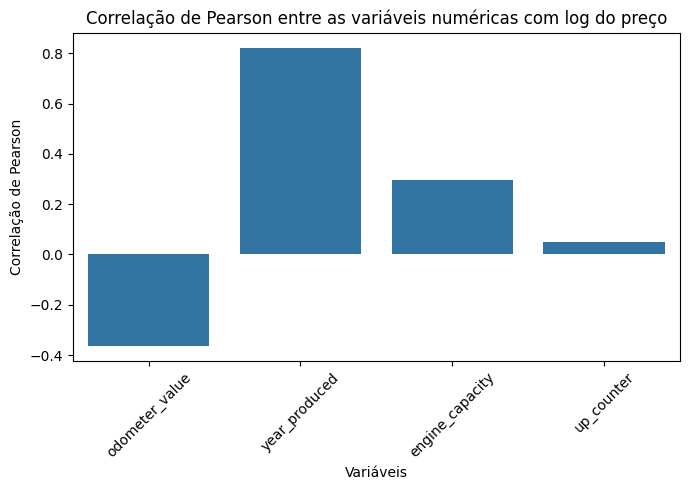

In [25]:
# Plotando a matriz de correlação com log do preço como um gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(data=correlacao_log_preco, errorbar=None)
plt.title('Correlação de Pearson entre as variáveis numéricas com log do preço')
plt.xlabel('Variáveis')
plt.ylabel('Correlação de Pearson')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2.** Variáveis booleanas (binárias): Para cada variável booleana, trace
um gráfico da distribuição das classes e outro cruzando seus valores
com os da variável alvo. Uma sugestão seria um gráfico de barras
horizontais para a distribuição e o sns.catplot para o cruzamento com
o preço.


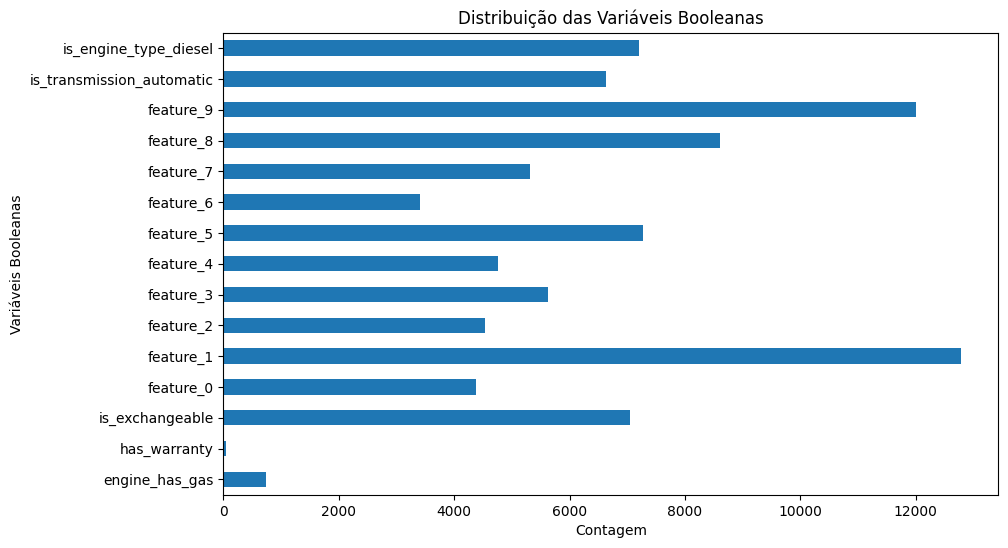

In [26]:
# Separei as booleanas
dados_bool = X_train.select_dtypes(include=['bool'])

# Plotagem
plt.figure(figsize=(10, 6))
dados_bool.sum().plot(kind='barh')
plt.title('Distribuição das Variáveis Booleanas')
plt.xlabel('Contagem')
plt.ylabel('Variáveis Booleanas')
plt.show()

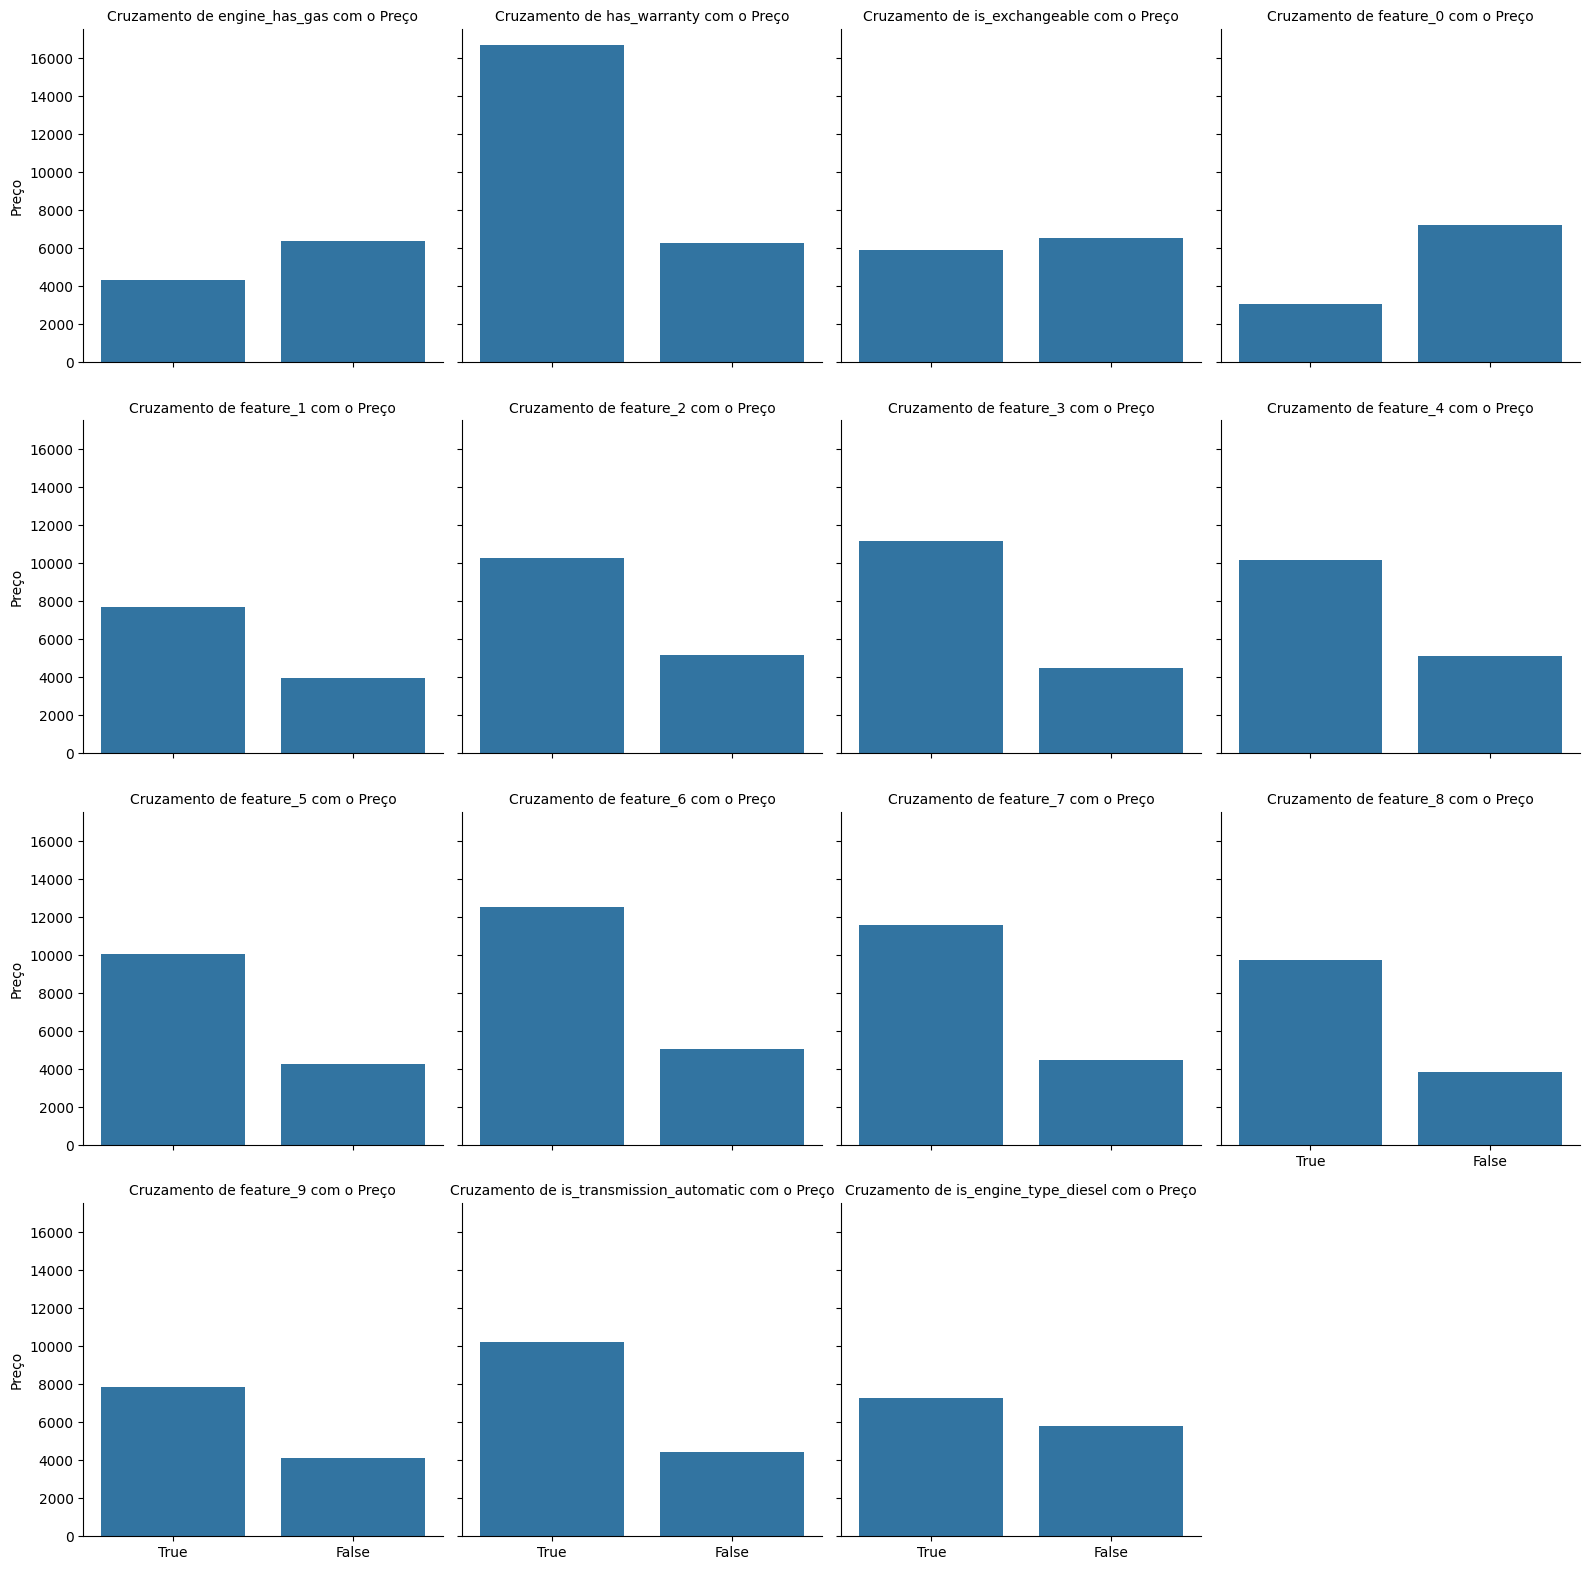

In [27]:
# Concatenando os dados booleanos com os preços
dados_combinados = pd.concat([dados_bool, y_train], axis=1)

# Seaborn estava dando warning por não definir uma ordem de plots, solução:
order = dados_bool.columns

# Usando FacetGrid para plotar todos os gráficos de uma vez, gostei pra plotar os gráficos lado a lado.
grade = sns.FacetGrid(dados_combinados.melt(id_vars='price_usd'),
                    col='variable', col_wrap=4, height=4)
grade.map(sns.barplot, 'value', 'price_usd', order=[True, False], errorbar=None)
grade.set_titles("Cruzamento de {col_name} com o Preço")
grade.set_axis_labels("", "Preço")
plt.show()

**3.** Variáveis categóricas (não-binárias): Para cada variável categórica,
repita os mesmos passos do item anterior. Fique à vontade para limitar
o número de categorias quando for muito elevado, selecionando as
que são mais frequentes.


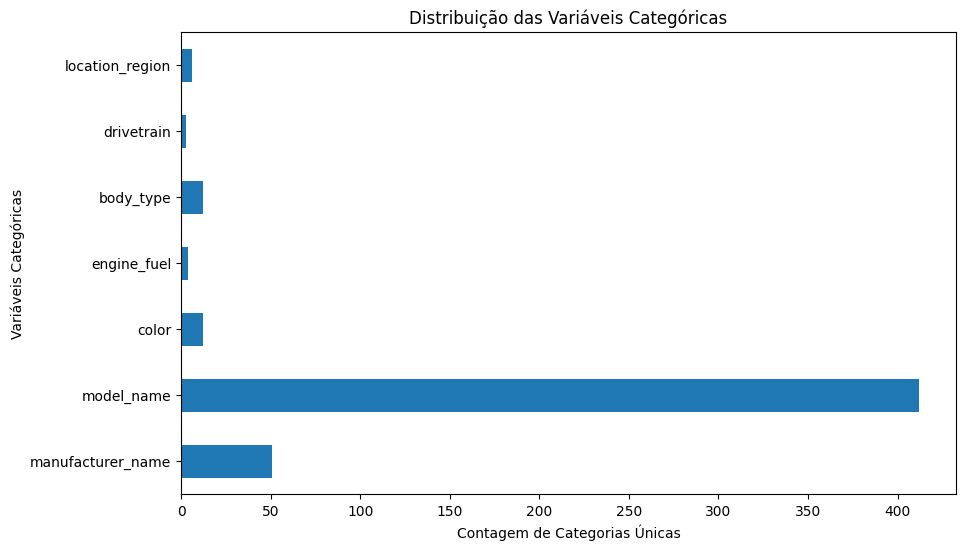

In [28]:
# Separei as categoricas
dados_categoricos = X_train.select_dtypes(include=['object'])

# Plotagem
plt.figure(figsize=(10, 6))
dados_categoricos.nunique().plot(kind='barh')
plt.title('Distribuição das Variáveis Categóricas')
plt.xlabel('Contagem de Categorias Únicas')
plt.ylabel('Variáveis Categóricas')
plt.show()

<Figure size 1000x600 with 0 Axes>

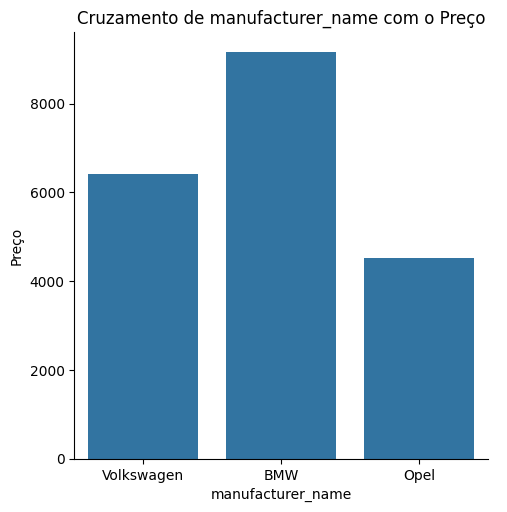

<Figure size 1000x600 with 0 Axes>

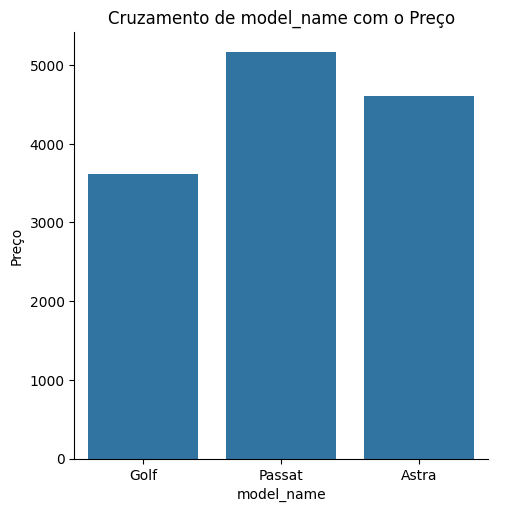

<Figure size 1000x600 with 0 Axes>

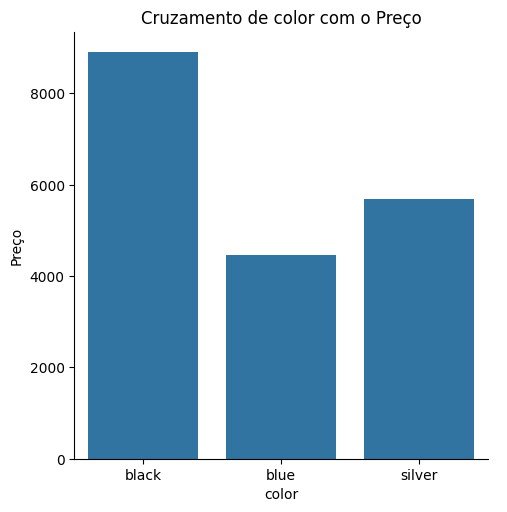

<Figure size 1000x600 with 0 Axes>

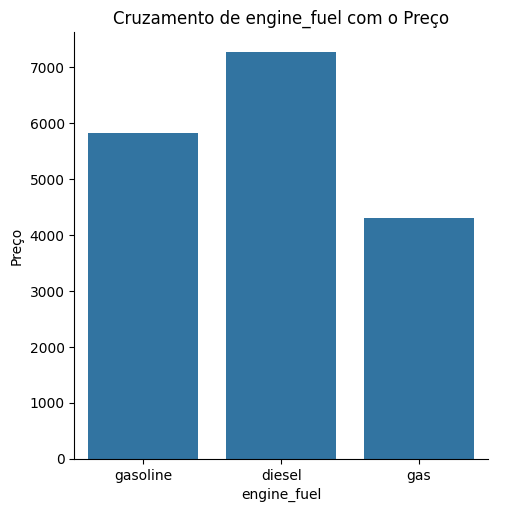

<Figure size 1000x600 with 0 Axes>

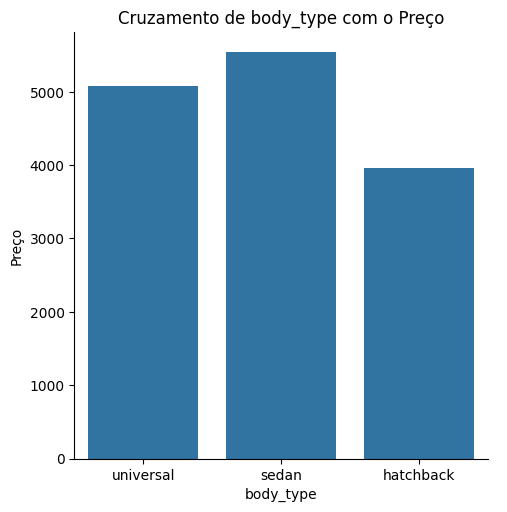

<Figure size 1000x600 with 0 Axes>

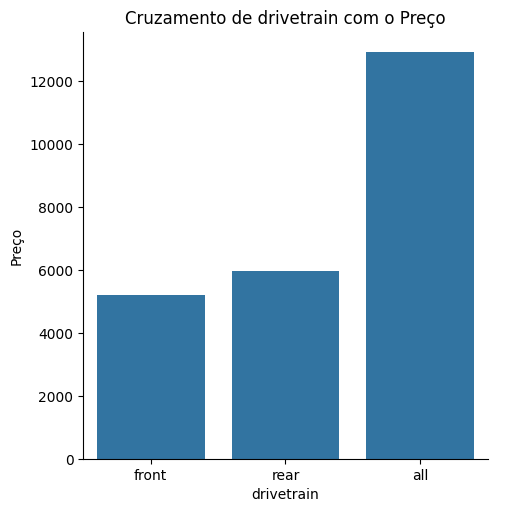

<Figure size 1000x600 with 0 Axes>

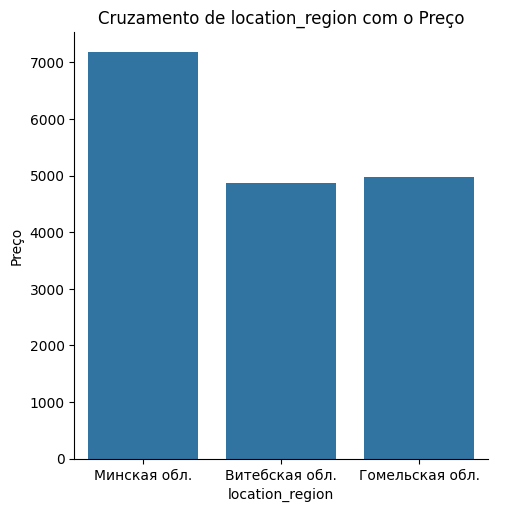

In [29]:
# Número de categorias mais frequentes a serem selecionadas, só mudar o valor, deixei em 3
num_top_categories = 3
# Selecionando as num_top_categories categorias mais frequentes para cada variável categórica
top_categories = {}
for col in dados_categoricos.columns:
    top_categories[col] = dados_categoricos[col].value_counts().nlargest(num_top_categories).index.tolist()
# Filtrar o DataFrame para manter apenas as num_top_categories categorias mais frequentes
dados_categoricos_top = dados_categoricos.copy()
for col, categories in top_categories.items():
    dados_categoricos_top[col] = dados_categoricos_top[col].apply(lambda x: x if x in categories else None)

# Cruzamento das variáveis categóricas com o preço
for col in dados_categoricos_top.columns:
    plt.figure(figsize=(10, 6))
    sns.catplot(x=col, y='price_usd', data=pd.concat([dados_categoricos_top, y_train], axis=1), kind='bar', errorbar=None)
    plt.title(f'Cruzamento de {col} com o Preço')
    plt.xlabel(col)
    plt.ylabel('Preço')
    plt.show()

## 4 - Seleção de hiperparâmetros

**1.** Somente com atributos numéricos

**a.** Construa uma pipeline que contenha o pré-processamento
(nesse caso, somente seleciona os dados numéricos) e também
contenha o modelo de Regressão linear. Realize o treinamento
e mostre os resultados no conjunto de treinamento e também
no conjunto de validação.

In [30]:
# 1.a.
# Lista das características numéricas
num_features = ['odometer_value', 'year_produced', 'engine_capacity', 'up_counter']

# Criando o preprocessamento
preprocess = make_column_transformer(
    ('passthrough', num_features)  # Mantém as características numéricas
)

model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)

root_mean_squared_error = lambda a, b: np.sqrt(np.mean((a - b)**2))
print(f'Train RMSE: {root_mean_squared_error(y_train, model.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.1%}')

Train RMSE: 3461.84
Train MAPE: 77.1%
Validation RMSE: 3472.49
Validation MAPE: 79.0%


**1.b.** Repita a letra a., mas escalonando os dados com o
StandardScaler ao invés de não escaloná-los. Teve alguma
diferença nos resultados? Explique o porquê.

In [31]:
# 1.b.
# Criando o preprocessamento com StandardScaler
preprocess_scale = make_column_transformer(
    (StandardScaler(), num_features),  # Escalona as características numéricas usando StandardScaler
)

model = make_pipeline(preprocess_scale, LinearRegression())
model.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test)):.1%}')

"""
Os resultados ficaram iguais para as letras "a" e "b" porque mesmo que tenhamos aplicado StandardScaler na letra "b"
a regressão linear em si não é sensível à escala do atributos. Ou seja, para este conjunto de dados e este modelo,
a escala dos atributos não teve impacto no desempenho do modelo.
"""

Train RMSE: 3461.84
Train MAPE: 77.1%
Validation RMSE: 3472.49
Validation MAPE: 79.0%


'\nOs resultados ficaram iguais para as letras "a" e "b" porque mesmo que tenhamos aplicado StandardScaler na letra "b"\na regressão linear em si não é sensível à escala do atributos. Ou seja, para este conjunto de dados e este modelo,\na escala dos atributos não teve impacto no desempenho do modelo.\n'

**2.** Somente com atributos booleanos: construa uma nova pipeline de
pré-processamento que seleciona somente os dados booleanos e
repassa esses dados para um modelo de regressão linear. Treine esse
novo modelo e observe os resultados.

In [32]:
# Lista das características booleanas
bool_features = ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
                    'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
                    'is_transmission_automatic', 'is_engine_type_diesel']

# Criando o preprocessamento
preprocess_bool = make_column_transformer(
    ('passthrough', bool_features)
)

model_bool = make_pipeline(preprocess_bool, LinearRegression())
model_bool.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model_bool.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_bool.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_bool.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_bool.predict(X_test)):.1%}')

"""
RMSE e MAPE deram mais altos para os dados booleanos, sugerindo um desempenho inferior se comparado com os dados numéricos.
Um motivo pode ser porque a regressão linear não é um dos melhores modelos para lidar com variáveis binárias.
"""

Train RMSE: 4074.97
Train MAPE: 81.1%
Validation RMSE: 4141.83
Validation MAPE: 81.7%


'\nRMSE e MAPE deram mais altos para os dados booleanos, sugerindo um desempenho inferior se comparado com os dados numéricos.\nUm motivo pode ser porque a regressão linear não é um dos melhores modelos para lidar com variáveis binárias.\n'

**3.** Somente com atributos categóricos: Faça o mesmo que na letra
anterior, mas utilizando os dados categóricos ao invés dos binários.
Para tal, utilize o OneHotEncoder na pipeline de processamento.

In [33]:
# Lista das características categóricas
cat_features = ['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type', 'drivetrain', 'location_region']

# Criando o preprocessamento com OneHotEncoder
preprocess_cat = make_column_transformer(
    (OneHotEncoder(), cat_features),  # Aplica OneHotEncoder nas características categóricas
    remainder='passthrough'
)

model_cat = make_pipeline(preprocess_cat, LinearRegression())
model_cat.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model_cat.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_cat.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_cat.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_cat.predict(X_test)):.1%}')

Train RMSE: 3101.81
Train MAPE: 64.4%
Validation RMSE: 3129.69
Validation MAPE: 65.1%


**4.** Todos os atributos: crie uma pipeline que utilizará todos os dados
(numéricos, binários e categóricos). Realize o treinamento e observe
os resultados.

In [34]:
# Criando o preprocessamento com OneHotEncoder para características categóricas
preprocess_all = make_column_transformer(
    (OneHotEncoder(), cat_features),  # Codifica as características categóricas
    (StandardScaler(), num_features),  # Escalona as características numéricas
    ('passthrough', bool_features)  # Mantém as características booleanas
)

model_all = make_pipeline(preprocess_all, LinearRegression())
model_all.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model_all.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_all.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_all.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_all.predict(X_test)):.1%}')

"""
O modelo parece estar tendo um performance razoavelmente boa, com o RMSE tanto em treinamento como em validação relativamente baixo.
A diferença entre o conjunto de treinamento e validação é pouca, indicando que o modelo não esta tendo muito overfitting.
"""

Train RMSE: 2370.78
Train MAPE: 50.1%
Validation RMSE: 2490.59
Validation MAPE: 53.3%


'\nO modelo parece estar tendo um performance razoavelmente boa, com o RMSE tanto em treinamento como em validação relativamente baixo.\nA diferença entre o conjunto de treinamento e validação é pouca, indicando que o modelo não esta tendo muito overfitting.\n'

**5.** Polynomial features: Crie uma pipeline que irá aplicar
PolynomialFeatures somente nos dados numéricos. Após essa
aplicação, faça o escalonamento desses dados utilizando o
StandardScaler e junte com o resto dos dados (binários e categóricos).

In [35]:
# Criando a pipeline para aplicar PolynomialFeatures e StandardScaler apenas nos dados numéricos
num_pipeline = make_pipeline(PolynomialFeatures(2, include_bias=False), StandardScaler())

preprocess_pol = make_column_transformer(
    (OneHotEncoder(), cat_features),
    (num_pipeline, num_features),
    ('passthrough', bool_features)
)

preprocess_pol


ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 ['manufacturer_name', 'model_name', 'color',
                                  'engine_fuel', 'body_type', 'drivetrain',
                                  'location_region']),
                                ('pipeline',
                                 Pipeline(steps=[('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['odometer_value', 'year_produced',
                                  'engine_capacity', 'up_counter']),
                                ('passthrough', 'passthrough',
                                 ['engine_has_gas', 'has_warranty',
                                  'is_exchangeable', 'feature_0', 'feature_1',
                                  'feature_2', 'feature_3', 'feature_4',
                                  'feature_5', 'feature_6', 'feature_7',
                                  'feature_8', 'feature_9',
                                  'is_transmission_automatic',
                                  'is_engine_type_diesel'])])

**5.a.** Primeiramente, realize um treinamento utilizando somente o
PolynomialFeatures com a regressão linear (teste ao menos
para os valores d=2, 5 e 10). Observe os resultados e comente
o que foi obtido.

In [36]:
# Fiz com for pra ficar mais fácil
degree = [2, 5, 10]
for d in degree:
    # Fiz preprocess_pol_2 apenas pra manter a preprocess_pol "intacta"
    num_pol_pipeline = make_pipeline(PolynomialFeatures(d, include_bias=False), StandardScaler())
    preprocess_pol_2 = make_column_transformer(
        (OneHotEncoder(), cat_features),  # Codifica as características categóricas
        (num_pol_pipeline, num_features),  # Escalona as características numéricas
        ('passthrough', bool_features)  # Mantém as características booleanas
    )
    model_pol_2 = make_pipeline(preprocess_pol_2, LinearRegression())
    model_pol_2.fit(X_train, y_train)

    print("\n")
    print("Para d = ", d)
    print(f'Train RMSE: {root_mean_squared_error(y_train, model_pol_2.predict(X_train)):.2f}')
    print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_pol_2.predict(X_train)):.1%}')
    print(f'Validation RMSE: {root_mean_squared_error(y_test, model_pol_2.predict(X_test)):.2f}')
    print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_pol_2.predict(X_test)):.1%}')
    
"""
Para o d = 2, o erro de validação e treinamento está razoável, a validação um pouco maior que o treinamento pode indicar um pouco de viés.
Para o d = 5, está com um desempenho um pouco melhor que o d = 2, diminuiu os erros de validação e treinamento.
Para o d = 10, o erro de treinamento diminuiu bastante, porém o erro de validação explodiu, significa extremo overfitting.
"""



Para d =  2
Train RMSE: 1893.71
Train MAPE: 34.1%
Validation RMSE: 1964.82
Validation MAPE: 36.3%


Para d =  5
Train RMSE: 1804.84
Train MAPE: 32.3%
Validation RMSE: 3960.67
Validation MAPE: 34.2%


Para d =  10
Train RMSE: 1526.55
Train MAPE: 27.4%
Validation RMSE: 29065470551.42
Validation MAPE: 6059463.9%


'\nPara o d = 2, o erro de validação e treinamento está razoável, a validação um pouco maior que o treinamento pode indicar um pouco de viés.\nPara o d = 5, está com um desempenho um pouco melhor que o d = 2, diminuiu os erros de validação e treinamento.\nPara o d = 10, o erro de treinamento diminuiu bastante, porém o erro de validação explodiu, significa extremo overfitting.\n'

**5.b.** Repita o treinamento e avaliação, mas dessa vez utilizando o
modelo Ridge (fazendo uma busca pelo melhor valor do
hiperparâmetro alpha, testando ao menos 3 valores, sendo um
deles alpha=1, que é o padrão). O que esses novos resultados
demonstram? (Obs: outros valores de hiperparâmetros podem
ser avaliados, a tabela abaixo é apenas um exemplo.)

In [37]:
# Novamente fiz com for pra ficar mais fácil, usei apenas esses 4 valores pois demora muito pra rodar com mais
ridge = [1, 0.01, 10, 100]
for r in ridge:
    model_ridge = make_pipeline(preprocess_all, PolynomialFeatures(2, include_bias=False), Ridge(r))
    model_ridge.fit(X_train, y_train)

    print("\n")
    print("Para Ridge = ", r)
    print(f'Train RMSE: {root_mean_squared_error(y_train, model_ridge.predict(X_train)):.2f}')
    print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ridge.predict(X_train)):.1%}')
    print(f'Validation RMSE: {root_mean_squared_error(y_test, model_ridge.predict(X_test)):.2f}')
    print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_ridge.predict(X_test)):.1%}')
    
"""
O menor RMSE de treinamento foi com alpha igual a 0.01, indicando bom ajuste aos dados de treinamento, mas a validação esta alta
oque quer dizer overfitting.
Para a validação o melhor resultado foi com alpha igual a 10, mas mesmo assim ainda um pouco alto.
Pra mim o melhor resultado levando em conta o treinamento e a validação seria com alpha = 1, pois proporciona bom ajuste aos dados
de treinamento e mantém o RMSE de validação em um nível aceitável, sugerindo uma melhor capacidade de generalização do modelo.
"""



Para Ridge =  1
Train RMSE: 968.16
Train MAPE: 18.6%
Validation RMSE: 1834.42
Validation MAPE: 34.2%


Para Ridge =  0.01
Train RMSE: 867.38
Train MAPE: 15.5%
Validation RMSE: 3027.19
Validation MAPE: 54.7%


Para Ridge =  10
Train RMSE: 1189.57
Train MAPE: 22.5%
Validation RMSE: 1657.09
Validation MAPE: 30.2%


Para Ridge =  100
Train RMSE: 1486.97
Train MAPE: 26.5%
Validation RMSE: 1704.80
Validation MAPE: 30.4%


'\nO menor RMSE de treinamento foi com alpha igual a 0.01, indicando bom ajuste aos dados de treinamento, mas a validação esta alta\noque quer dizer overfitting.\nPara a validação o melhor resultado foi com alpha igual a 10, mas mesmo assim ainda um pouco alto.\nPra mim o melhor resultado levando em conta o treinamento e a validação seria com alpha = 1, pois proporciona bom ajuste aos dados\nde treinamento e mantém o RMSE de validação em um nível aceitável, sugerindo uma melhor capacidade de generalização do modelo.\n'

**6.** TTR: Repita o item 4., utilizando o TransformTargetRegressor para
transformar a variável alvo (transformando através de Log e
retornando através da exponenciação).


In [38]:
model_ttr = make_pipeline(preprocess_all,TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp))
model_ttr.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model_ttr.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_ttr.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_ttr.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_ttr.predict(X_test)):.1%}')

Train RMSE: 1669.50
Train MAPE: 22.2%
Validation RMSE: 1678.35
Validation MAPE: 23.0%


**7.** TTR+Poly(+Ridge): Faça o mesmo que no item anterior, mas
utilizando o melhor modelo do item 5. como base.


In [39]:
model_best = make_pipeline(preprocess_all, PolynomialFeatures(2, include_bias=False), Ridge(1))
model_best_ttr = TransformedTargetRegressor(regressor=model_best, func=np.log, inverse_func=np.exp)
model_best_ttr.fit(X_train, y_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, model_best_ttr.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_best_ttr.predict(X_train)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_best_ttr.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_best_ttr.predict(X_test)):.1%}')

Train RMSE: 999.45
Train MAPE: 14.0%
Validation RMSE: 2089.35
Validation MAPE: 25.2%


**8.** Comente sobre o que foi descoberto nessa etapa da atividade.

In [40]:
"""
Do item 4.1 ao 4.4 a inclusão de todas as características resultou em um melhor desempenho do modelo, indicando que informações de diferentes tipos
de características podem complementar-se mutuamente na previsão da variável alvo.
No item 4.5.a o aumento do grau do polinômio resultou em um aumento na complexidade do modelo. Permitindo ao modelo capturar relações mais
complexas nos dados, mas também aumenta o risco de overfitting como aconteceu no caso do d=10.
No item 4.5.b usando alpha 0.01 resultou em overfitting, onde o modelo se ajustou muito aos dados de treinamento e obtendo um resultado ruim na
validação. Já para alphas mais altos (10 e 100) o desempenho ficou razoável apresentando capacidade de generalização aceitável. E para alpha 1
foi obtido o melhor resultado desempenho consistente tanto nos dados de treinamento quanto nos dados de validação, indicando uma melhor 
capacidade de generalização do modelo.
No item 4.7, parece que o resultado do item 4.6 tem um desempenho melhor sendo provavelmente o mais confiável, pois a aplicação de uma 
transformação logarítmica à variável alvo pode ajudar a estabilizar sua distribuição reduzindo também a magnitude das diferenças entre valores extremos.
"""

'\nDo item 4.1 ao 4.4 a inclusão de todas as características resultou em um melhor desempenho do modelo, indicando que informações de diferentes tipos\nde características podem complementar-se mutuamente na previsão da variável alvo.\nNo item 4.5.a o aumento do grau do polinômio resultou em um aumento na complexidade do modelo. Permitindo ao modelo capturar relações mais\ncomplexas nos dados, mas também aumenta o risco de overfitting como aconteceu no caso do d=10.\nNo item 4.5.b usando alpha 0.01 resultou em overfitting, onde o modelo se ajustou muito aos dados de treinamento e obtendo um resultado ruim na\nvalidação. Já para alphas mais altos (10 e 100) o desempenho ficou razoável apresentando capacidade de generalização aceitável. E para alpha 1\nfoi obtido o melhor resultado desempenho consistente tanto nos dados de treinamento quanto nos dados de validação, indicando uma melhor \ncapacidade de generalização do modelo.\nNo item 4.7, parece que o resultado do item 4.6 tem um desempe

## 5 - Retreinamento e resultados no conjunto de teste

**1.** Regressão linear com todos os atributos (item 4.4)


In [41]:
# Concatenando os conjuntos de dados de treinamento e validação para características e rótulos
X_train_val = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_train_val = pd.concat([y_train, y_test], axis=0, ignore_index=True)

model_all = make_pipeline(preprocess_all, LinearRegression())
model_all.fit(X_train_val, y_train_val)

print(f'Train RMSE: {root_mean_squared_error(y_train_val, model_all.predict(X_train_val)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_val, model_all.predict(X_train_val)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_all.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_all.predict(X_test)):.1%}')

Train RMSE: 2392.40
Train MAPE: 50.9%
Validation RMSE: 2431.65
Validation MAPE: 52.2%


**2.** Polynomial features (item 4.5)


In [42]:
model_ridge = make_pipeline(preprocess_all, PolynomialFeatures(2, include_bias=False), Ridge(1))
model_ridge.fit(X_train_val, y_train_val)

print(f'Train RMSE: {root_mean_squared_error(y_train_val, model_ridge.predict(X_train_val)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_val, model_ridge.predict(X_train_val)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_ridge.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_ridge.predict(X_test)):.1%}')

Train RMSE: 1055.05
Train MAPE: 19.6%
Validation RMSE: 1081.05
Validation MAPE: 19.5%


**3.** TTR (item 4.6)

In [43]:
model_ttr = make_pipeline(preprocess_all,TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp))
model_ttr.fit(X_train_val, y_train_val)

print(f'Train RMSE: {root_mean_squared_error(y_train_val, model_ttr.predict(X_train_val)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_val, model_ttr.predict(X_train_val)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_ttr.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_ttr.predict(X_test)):.1%}')

Train RMSE: 1670.92
Train MAPE: 22.2%
Validation RMSE: 1642.29
Validation MAPE: 22.3%


**4.** TTR+Poly(+Ridge) (item 4.7)


In [44]:
model_best = make_pipeline(preprocess_all, PolynomialFeatures(2, include_bias=False), Ridge(1))
model_best_ttr = TransformedTargetRegressor(regressor=model_best, func=np.log, inverse_func=np.exp)
model_best_ttr.fit(X_train_val, y_train_val)

print(f'Train RMSE: {root_mean_squared_error(y_train_val, model_best_ttr.predict(X_train_val)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train_val, model_best_ttr.predict(X_train_val)):.1%}')
print(f'Validation RMSE: {root_mean_squared_error(y_test, model_best_ttr.predict(X_test)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_test, model_best_ttr.predict(X_test)):.1%}')

Train RMSE: 1071.06
Train MAPE: 14.9%
Validation RMSE: 1103.92
Validation MAPE: 14.6%


## 6 - Análise de resultados

**1.** Mostre um scatter plot entre os valores reais e preditos para o melhor modelo encontrado

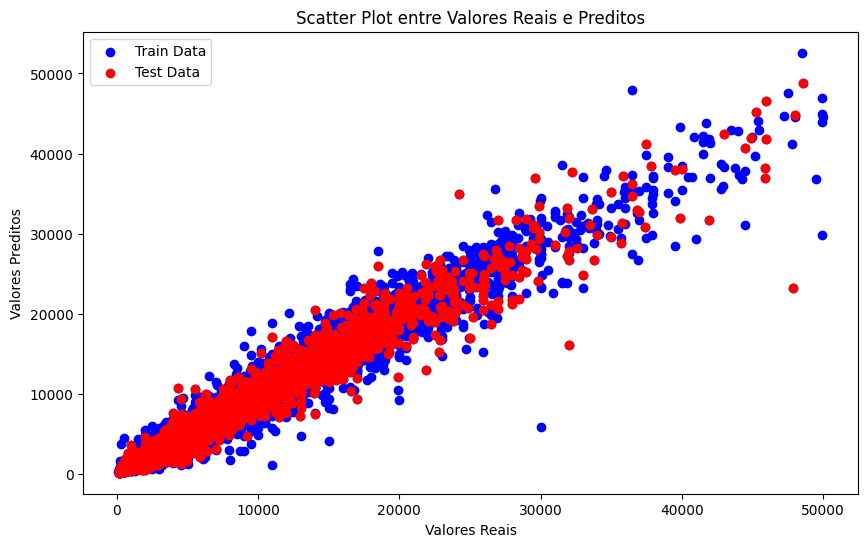

In [45]:
# Obtendo os valores preditos para os dados de treinamento e teste
y_train_pred = model_best_ttr.predict(X_train_val)
y_test_pred = model_best_ttr.predict(X_test)

# Plotando o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_val, y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')
plt.title('Scatter Plot entre Valores Reais e Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.legend()
plt.show()

**2.** Mostre a distribuição do erro das predições

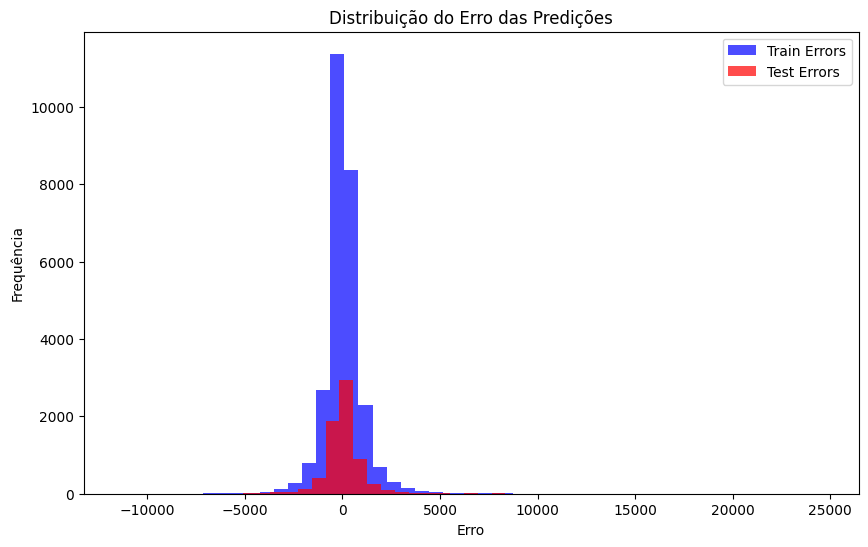

In [54]:
# Calculando o erro das predições
train_errors = y_train_val - y_train_pred
test_errors = y_test - y_test_pred

# Plotando o histograma dos erros
plt.figure(figsize=(10, 6))
plt.hist(train_errors, bins=50, color='blue', alpha=0.7, label='Train Errors')
plt.hist(test_errors, bins=50, color='red', alpha=0.7, label='Test Errors')
plt.title('Distribuição do Erro das Predições')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.legend()
plt.show()

**3.** As suas conclusões mudariam caso a métrica de avaliação
considerada fosse o RMSE ao invés do MAPE? Explique.


In [47]:
"""
se a métrica de avaliação fosse mudada para o RMSE, poderíamos observar diferenças, especialmente em relação à sensibilidade a outliers 
e à interpretação dos erros. Se houver muitos outliers nos dados, o RMSE pode ser mais afetado, enquanto o MAPE pode oferecer uma 
avaliação mais estável do desempenho do modelo.
No resultado do "best" modelo por exemplo o desempenho é estável em termos de erro tanto nos dados de treinamento quanto nos de validação,
indicando que o modelo está fazendo boas previsões, tanto em termos absolutos quanto percentuais, e está generalizando bem para novos dados.
"""

'\nse a métrica de avaliação fosse mudada para o RMSE, poderíamos observar diferenças, especialmente em relação à sensibilidade a outliers \ne à interpretação dos erros. Se houver muitos outliers nos dados, o RMSE pode ser mais afetado, enquanto o MAPE pode oferecer uma \navaliação mais estável do desempenho do modelo.\nNo resultado do "best" modelo por exemplo o desempenho é estável em termos de erro tanto nos dados de treinamento quanto nos de validação,\nindicando que o modelo está fazendo boas previsões, tanto em termos absolutos quanto percentuais, e está generalizando bem para novos dados.\n'

## 7 - Conclusão

**1.** Comentários gerais sobre o trabalho e sobre o que você aprendeu ao
realizá-lo


In [48]:
"""
Pra mim o trabalho foi muito educativo (mesmo achando difiícl a parte 4 em especial), principalmente para entender melhor sobre pipelines,
que pra mim acredito foi onde mais achei que tinha entendido e quando fiz o trabalho vi que ainda não o tinha.
De forma geral, achei muito melhor fazer este tipo de atividade do que apenas exercícios ou provas.
"""

'\nPra mim o trabalho foi muito educativo (mesmo achando difiícl a parte 4 em especial), principalmente para entender melhor sobre pipelines,\nque pra mim acredito foi onde mais achei que tinha entendido e quando fiz o trabalho vi que ainda não o tinha.\n\n'

**2.** Existe algum viés nos dados do dataset, por exemplo, por serem
dados de anúncios de vendas? 
O que isso poderia influenciar nos
modelos que estão sendo desenvolvidos? E quais limitações isso pode
trazer?


In [49]:
"""
Por se tratarem de dados de anúncios de vendas podem estar sujeitos a diversos problemas que podem influenciar os modelos desenvolvidos e suas previsões.
Pois dependem de alguns fatores como o cadastro dos dados, a coleta das informações, podem ter dados faltando ou preenchidos erroneamente.
As limitações causadas pelos viéses nos dados podem afetar a capacidade dos modelos de fazer boas previsões, reduzindo sua confiabilidade em cenários
do mundo real.
É muito importante reconhecer essas limitações e adotar boas práticas de coleta, pré-processamento e modelagem de dados para diminuir seus efeitos.
Isso inclui estratégias para lidar com valores ausentes, garantir a representatividade das variáveis selecionadas e realizar validação cruzada em
diferentes conjuntos de dados. Ao entender esses viéses durante o desenvolvimento e avaliação dos modelos, podemos tomar medidas para minimizar
seus impactos negativos e obter melhores previsões.
"""

'\nPor se tratarem de dados de anúncios de vendas podem estar sujeitos a diversos problemas que podem influenciar os modelos desenvolvidos e suas previsões.\nPois dependem de alguns fatores como o cadastro dos dados, a coleta das informações, podem ter dados faltando ou preenchidos erroneamente.\nAs limitações causadas pelos viéses nos dados podem afetar a capacidade dos modelos de fazer boas previsões, reduzindo sua confiabilidade em cenários\ndo mundo real.\nÉ muito importante reconhecer essas limitações e adotar boas práticas de coleta, pré-processamento e modelagem de dados para diminuir seus efeitos.\nIsso inclui estratégias para lidar com valores ausentes, garantir a representatividade das variáveis selecionadas e realizar validação cruzada em\ndiferentes conjuntos de dados. Ao entender esses viéses durante o desenvolvimento e avaliação dos modelos, podemos tomar medidas para minimizar\nseus impactos negativos e obter melhores previsões.\n'